头条文本分类数据探索

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../inputs/toutiao_cat_data.txt',sep='_!_',names=['news_id','cate_code','cate_name','news_title','news_keywords'])

C:\Users\win\AppData\Local\Temp\ipykernel_2392\1416503317.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('../inputs/toutiao_cat_data.txt',sep='_!_',names=['news_id','cate_code','cate_name','news_title','news_keywords'])


In [6]:
df.head()

,news_id,cate_code,cate_name,news_title,news_keywords
0,6551700932705387022,101,news_culture,京城最值得你来场文化之旅的博物馆,"保利集团,马未都,中国科学技术馆,博物馆,新中国"
1,6552368441838272771,101,news_culture,发酵床的垫料种类有哪些？哪种更好？,NaN
2,6552407965343678723,101,news_culture,上联：黄山黄河黄皮肤黄土高原。怎么对下联？,NaN
3,6552332417753940238,101,news_culture,林徽因什么理由拒绝了徐志摩而选择梁思成为终身伴侣？,NaN
4,6552475601595269390,101,news_culture,黄杨木是什么树？,NaN


In [11]:
[(i,df.isna()[i].sum()) for i in df.columns]

[('news_id', 0),
 ('cate_code', 0),
 ('cate_name', 0),
 ('news_title', 0),
 ('news_keywords', 122453)]

In [15]:
df.fillna('',inplace=True)

<Axes: xlabel='cate_code'>

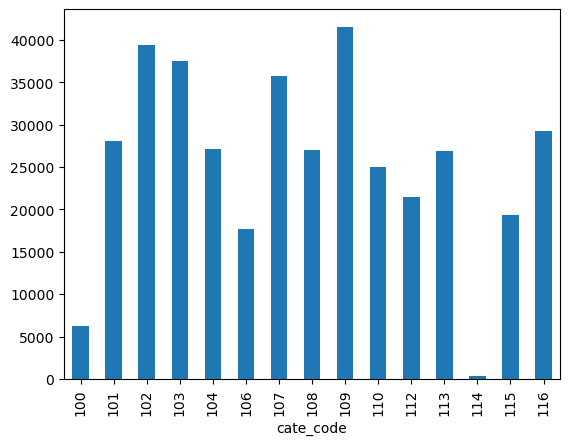

In [13]:
df.groupby(by='cate_code')['cate_code'].count().plot(kind='bar')

In [14]:
df[['cate_code','cate_name']].value_counts()

cate_code  cate_name         
109        news_tech             41543
102        news_entertainment    39396
103        news_sports           37568
107        news_car              35785
116        news_game             29300
101        news_culture          28031
104        news_finance          27085
108        news_edu              27058
113        news_world            26909
110        news_military         24984
112        news_travel           21422
115        news_agriculture      19322
106        news_house            17672
100        news_story             6273
114        stock                   340
dtype: int64

In [16]:
import pandas as pd
from sklearn import model_selection
import config

def create_folds(data,target_type):
    '''
    :param data: a dataframe
    :param target_type: a string, 'c' for categorical target 'd' for continuous target
    if 'c' then data must have a target column
    ''' 
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1

    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    if target_type == 'd':
        # calculate the number of bins by Sturge's rule
        # I take the floor of the value, you can also
        # just round it
        num_bins = int(np.floor(1 + np.log2(len(data))))
        # bin targets
        data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
        )



        # fill the new kfold column
        # note that, instead of targets, we use bins!
        for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
            data.loc[v_, 'kfold'] = f

        # drop the bins column
        data = data.drop("bins", axis=1)
    if target_type == 'c':
        # fill the new kfold column
        # note that, instead of targets, we use bins!
        for f, (t_, v_) in enumerate(kf.split(X=data, y=data.target.values)):
            data.loc[v_, 'kfold'] = f        
    # return dataframe with folds
    return data
    if __name__ == "__main__":
        df = pd.read_csv(config.RAW_DATA,sep='_!_',names=['news_id','cate_code','cate_name','news_title','news_keywords'])
        print('原始数据的缺失情况')
        print([(i,df.isna()[i].sum()) for i in df.columns])
        # create folds
        df = create_folds(df)